# 09. 할로윈 투자 전략

## 9.1 할로윈 투자 전략

In [12]:
import FinanceDataReader as fdr

# kospi = fdr.DataReader(symbol="KS11", start="2000") # 현재 에러 발생 중 체크 필요
# kospi.to_excel("data/kospi.xlsx")

In [9]:
import pandas as pd

kospi = pd.read_excel("data/kospi.xlsx", index_col=0)
kospi.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,195900000.0,0.0301
2000-01-05,986.31,1006.87,1026.52,984.05,257700000.0,-0.0687
2000-01-06,960.79,1013.95,1014.90,953.50,203520000.0,-0.0259
2000-01-07,948.65,949.17,970.16,930.84,215660000.0,-0.0126
2000-01-10,987.24,979.67,994.94,965.02,240180000.0,0.0407


In [14]:
kospi.loc["2000-11"].head(1)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2000-11-01,548.76,524.69,550.06,522.78,366440000.0,0.0666


In [15]:
kospi.loc["2001-04"].head(1)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2001-04-02,515.2,520.56,522.09,512.4,231820000.0,-0.0153


- Backtest : 주어진 포트폴리오로 과거의 역사에 대입해보고 주가의 흐름이나 수익률을 볼 수 있는 방법

In [17]:
누적수익률 = 1

for year in range(2000, 2021):
    buy_mon = str(year) + '-11'
    sell_mon = str(year+1) + '-04'
    print(buy_mon, sell_mon)

2000-11 2001-04
2001-11 2002-04
2002-11 2003-04
2003-11 2004-04
2004-11 2005-04
2005-11 2006-04
2006-11 2007-04
2007-11 2008-04
2008-11 2009-04
2009-11 2010-04
2010-11 2011-04
2011-11 2012-04
2012-11 2013-04
2013-11 2014-04
2014-11 2015-04
2015-11 2016-04
2016-11 2017-04
2017-11 2018-04
2018-11 2019-04
2019-11 2020-04
2020-11 2021-04


- 누적 수익률

In [18]:
누적수익률 = 1

for year in range(2000, 2021):
    buy_mon = str(year) + '-11'
    sell_mon = str(year+1) + '-04'
    #print(buy_mon, sell_mon)
    
    # 매수가
    매수가 = kospi.loc[buy_mon].iloc[0]['Open']
    
    # 매도가
    매도가 = kospi.loc[sell_mon].iloc[-1]['Close']
    
    # 수익률 
    수익률 = 매도가/매수가
    누적수익률 = 누적수익률 * 수익률
    
print(누적수익률)

6.18585306815823


- 연평균 수익률

In [19]:
CAGR = (누적수익률 ** (1/21)) -1  # 투자기간 21년
CAGR * 100

9.06507321504515

- 단순 보유한 경우의 연평균수익률도 5.44%

In [21]:
단순보유누적수익률 = kospi.iloc[-1]['Close'] / kospi.iloc[0]['Open']
단순보유CAGR = 단순보유누적수익률 ** (1/21) - 1
단순보유CAGR * 100

5.449703577738263

## 9.2 할로운 투자전략 백테스팅

In [22]:
import datetime
from dateutil.relativedelta import relativedelta

start = datetime.datetime(year=2000, month=11, day=1)
end = start + relativedelta(months=5)

print(start.strftime("%Y-%m"))
print(end.strftime("%Y-%m"))

2000-11
2001-04


In [23]:
def 투자6개월(df, start_year=2000, end_year=2020, month=11):    
    
    for year in range(start_year, end_year): 
        start = datetime.datetime(year=year, month=month, day=1)
        end = start + relativedelta(months=5)
        
        print(start.strftime("%Y-%m"), end.strftime("%Y-%m"))

In [24]:
투자6개월(None, start_year=2000, end_year=2020, month=12)

2000-12 2001-05
2001-12 2002-05
2002-12 2003-05
2003-12 2004-05
2004-12 2005-05
2005-12 2006-05
2006-12 2007-05
2007-12 2008-05
2008-12 2009-05
2009-12 2010-05
2010-12 2011-05
2011-12 2012-05
2012-12 2013-05
2013-12 2014-05
2014-12 2015-05
2015-12 2016-05
2016-12 2017-05
2017-12 2018-05
2018-12 2019-05
2019-12 2020-05


In [25]:
def 투자6개월(df, start_year=2000, end_year=2020, month=11):    
    누적수익률 = 1
    
    for year in range(start_year, end_year): 
        start = datetime.datetime(year=year, month=month, day=1)
        end = start + relativedelta(months=5)
        
        buy_mon = start.strftime("%Y-%m")
        sell_mon = end.strftime("%Y-%m")
        
        # 매수가
        매수가 = df.loc[buy_mon].iloc[0]['Open']
    
        # 매도가
        매도가 = df.loc[sell_mon].iloc[-1]['Close']
    
        # 수익률 
        수익률 = 매도가/매수가
        누적수익률 = 누적수익률 * 수익률
    return 누적수익률

In [26]:
투자6개월(kospi, start_year=2000, end_year=2021, month=11)

6.18585306815823

In [27]:
for month in range(1, 12+1):
    ret = 투자6개월(kospi, start_year=2000, end_year=2021, month=month)
    print(f"{month:02} {ret:.2f}")

01 1.64
02 1.72
03 1.64
04 1.45
05 0.64
06 1.16
07 1.65
08 1.81
09 2.03
10 2.50
11 6.19
12 3.68


## 9.3 할로윈 투자 전략 시각화

In [28]:
data = {}

for month in range(1, 12+1):
    ret = 투자6개월(kospi, start_year=2000, end_year=2021, month=month)
    data[month] = ret

data

{1: 1.6431293835895036,
 2: 1.717483878326282,
 3: 1.643198522740701,
 4: 1.4531102639420366,
 5: 0.644593093127309,
 6: 1.162174968269313,
 7: 1.650871779226284,
 8: 1.8112056687936806,
 9: 2.0260433117752066,
 10: 2.496730984896318,
 11: 6.18585306815823,
 12: 3.684635391900742}

In [29]:
data.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

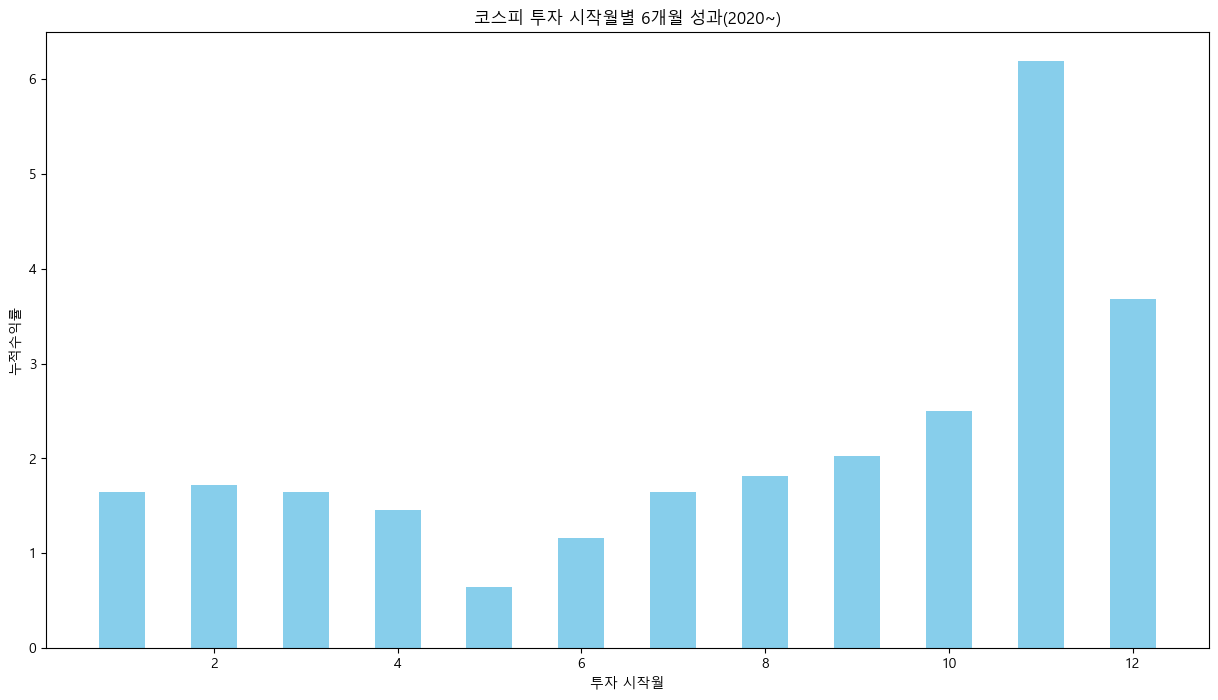

In [31]:
import matplotlib.pyplot as plt
import platform

# 한글처리
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic') 
else:
    plt.rc('font', family='Malgun Gothic') 
    
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.bar(
    x=list(data.keys()), 
    height=list(data.values()), 
    width=0.5, 
    color='skyblue'
)

plt.title("코스피 투 시작월별 6개월 성과(2020~)")
plt.xlabel("투자 시작월")
plt.ylabel("누적수익률")

plt.show()